# Import Packages

In [23]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 4.4 MB/s eta 0:00:00a 0:00:01


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [21]:
rel_file = '../raw_data/OASIS2/oasis_longitudinal_demographics.xlsx'

In [24]:
df = pd.read_excel(rel_file)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [26]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Visualisation

## MRI Sessions

In [27]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

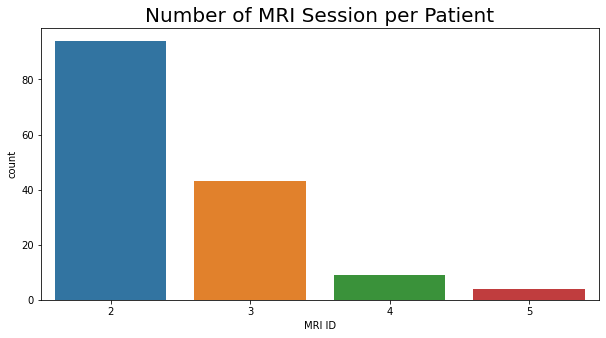

In [164]:
plt.figure(figsize=(10,5))
plt.title('Number of MRI Session per Patient', fontsize=20)
ax = sns.countplot(x=df.groupby('Subject ID')['MRI ID'].count())

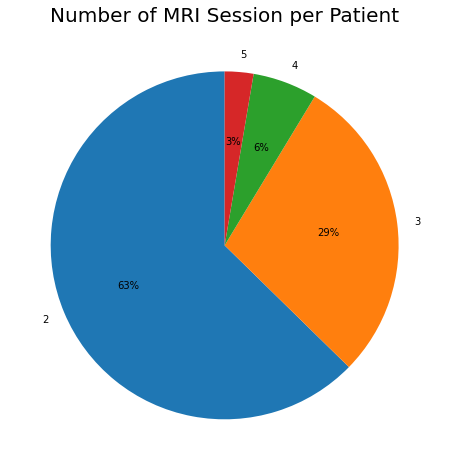

In [163]:
plt.figure(figsize=(14,8))
plt.title('Number of MRI Session per Patient', fontsize=20)
plt.pie(df.groupby('Subject ID').count().groupby('MRI ID').count()['Group'],
        labels = df.groupby('Subject ID').count().groupby('MRI ID').count()['Group'].index,
       startangle=90,
       autopct='%1.0f%%')
plt.show()

# Age

<AxesSubplot:title={'center':'(Mean) Age Distribution'}, xlabel='Age', ylabel='Count'>

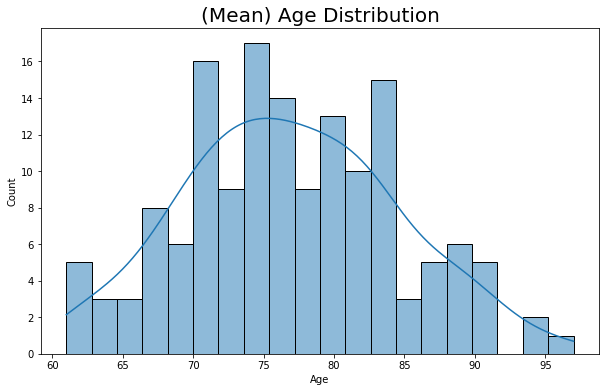

In [162]:
plt.figure(figsize=(10,6))
plt.title('(Mean) Age Distribution', fontsize=20)
sns.histplot(df.groupby(['Subject ID'])['Age'].mean(), kde=True, bins=20)

# Gender

In [98]:
df_gender = df.copy()

In [100]:
df_gender.drop_duplicates('Subject ID', inplace=True)

In [103]:
df_gender['M/F'].value_counts().values

array([88, 62])

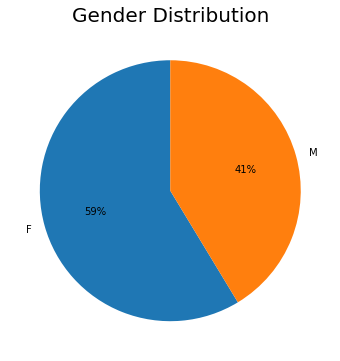

In [161]:
plt.figure(figsize=(10,6))
plt.title('Gender Distribution', fontsize=20)
plt.pie(df_gender['M/F'].value_counts().values,
        labels=df_gender['M/F'].value_counts().index,
       startangle=90,
       autopct='%1.0f%%')
plt.show()

# Education

<AxesSubplot:title={'center':'Years of Education'}, xlabel='EDUC', ylabel='count'>

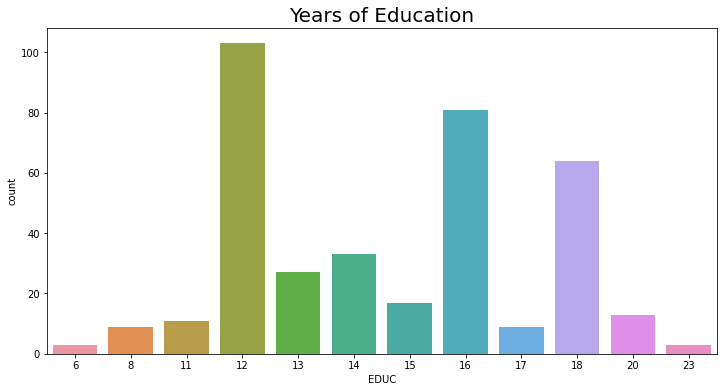

In [160]:
plt.figure(figsize=(12,6))
plt.title('Years of Education', fontsize=20)
sns.countplot(x=df['EDUC'])

# Social Economic Status

<AxesSubplot:title={'center':'Social Economic Status'}>

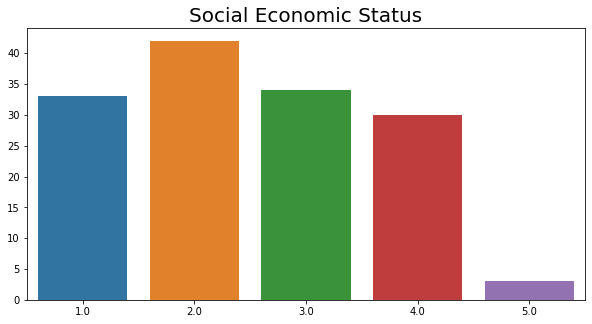

In [159]:
plt.figure(figsize=(10,5))
plt.title('Social Economic Status', fontsize=20)
sns.barplot(x = df_gender['SES'].value_counts().index,
           y = df_gender['SES'].value_counts().values)

# Mini-Mental State Examination

In [ ]:
df_mmse = df.copy()

<AxesSubplot:title={'center':'Mini-Mental State Examination'}, xlabel='MMSE', ylabel='Density'>

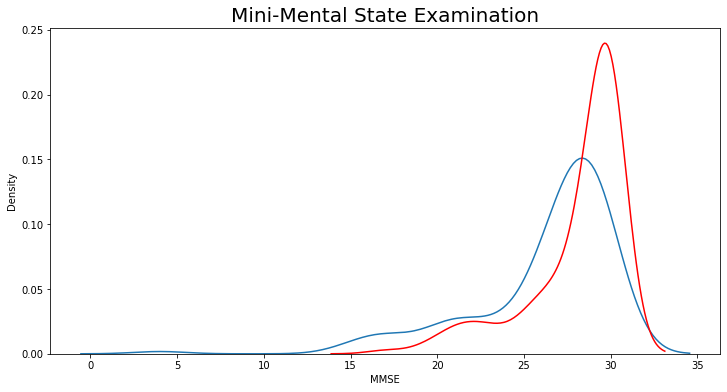

In [156]:
plt.figure(figsize=(12, 6))
plt.title('Mini-Mental State Examination', fontsize=20)
sns.kdeplot(df_mmse.groupby(['Subject ID'])['MMSE'].min())
sns.kdeplot(df_mmse.groupby(['Subject ID'])['MMSE'].max(), color='red')

# Clinical Dementia Rating

<AxesSubplot:title={'center':'Clinical Dementia Rating'}, xlabel='CDR', ylabel='Density'>

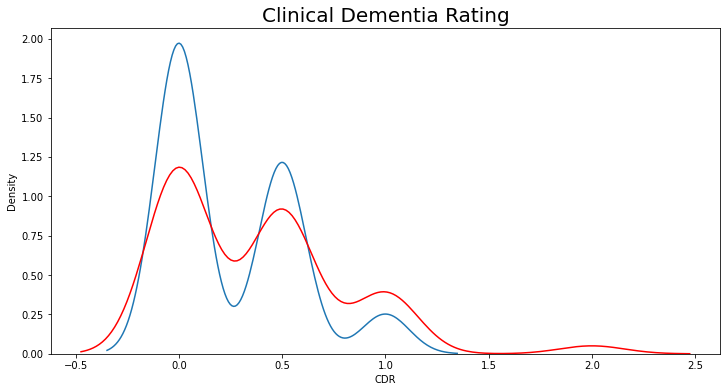

In [158]:
plt.figure(figsize=(12, 6))
plt.title('Clinical Dementia Rating', fontsize=20)
sns.kdeplot(df.groupby(['Subject ID'])['CDR'].min())
sns.kdeplot(df.groupby(['Subject ID'])['CDR'].max(), color='red')

# Brain Matter Volumes

<AxesSubplot:title={'center':'Estimated total intracranial volume / mm^3'}, xlabel='eTIV', ylabel='Density'>

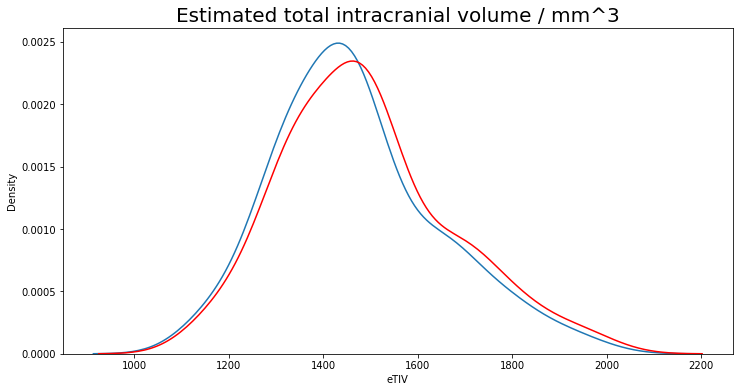

In [168]:
plt.figure(figsize=(12, 6))
plt.title('Estimated total intracranial volume / mm^3', fontsize=20)
sns.kdeplot(df.groupby(['Subject ID'])['eTIV'].min())
sns.kdeplot(df.groupby(['Subject ID'])['eTIV'].max(), color='red')

<AxesSubplot:title={'center':'Normalized whole brain volume'}, xlabel='nWBV', ylabel='Density'>

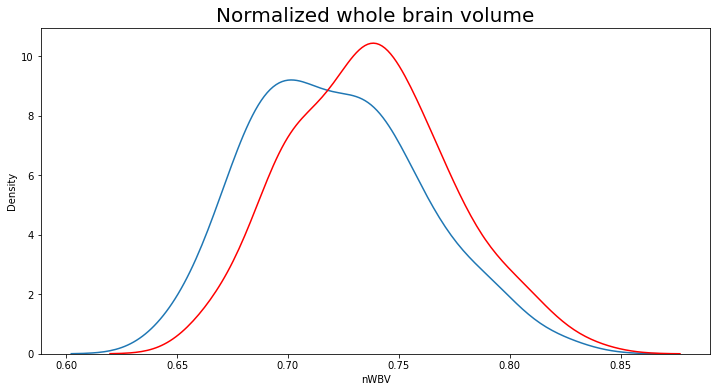

In [169]:
plt.figure(figsize=(12, 6))
plt.title('Normalized whole brain volume', fontsize=20)
sns.kdeplot(df.groupby(['Subject ID'])['nWBV'].min())
sns.kdeplot(df.groupby(['Subject ID'])['nWBV'].max(), color='red')

<AxesSubplot:title={'center':'Atlas scaling factor'}, xlabel='ASF', ylabel='Density'>

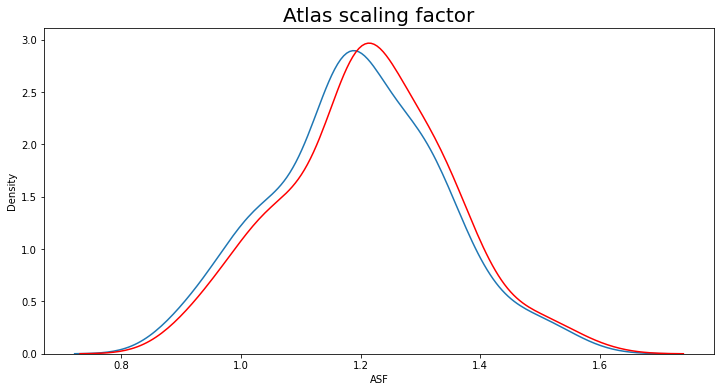

In [170]:
plt.figure(figsize=(12, 6))
plt.title('Atlas scaling factor', fontsize=20)
sns.kdeplot(df.groupby(['Subject ID'])['ASF'].min())
sns.kdeplot(df.groupby(['Subject ID'])['ASF'].max(), color='red')

# Group

In [175]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

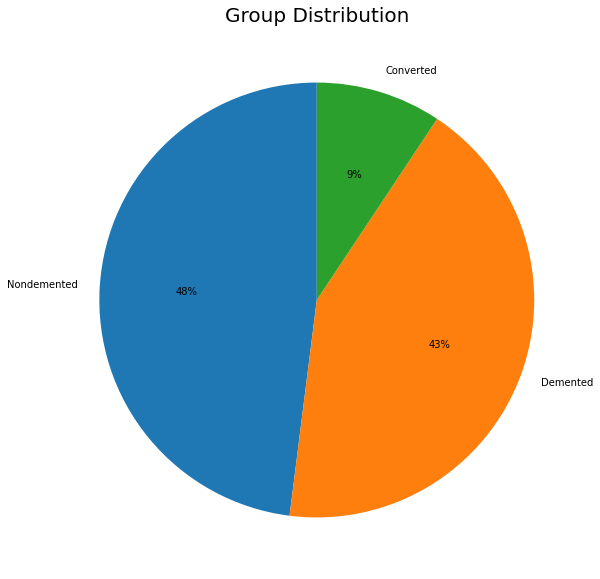

In [177]:
plt.figure(figsize=(10,10))
plt.title('Group Distribution', fontsize=20)
plt.pie(df_gender['Group'].value_counts().values,
        labels=df_gender['Group'].value_counts().index,
       startangle=90,
       autopct='%1.0f%%')
plt.show()